In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Importing Required Liberary

In [165]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import   RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [166]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [167]:
df.shape

(284807, 31)

In [168]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [169]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [171]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [172]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [173]:
df[df["Class"]==1].describe()["Time"]

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [174]:
df[df["Class"]==0].describe()["Time"]

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [175]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory Data Analysis

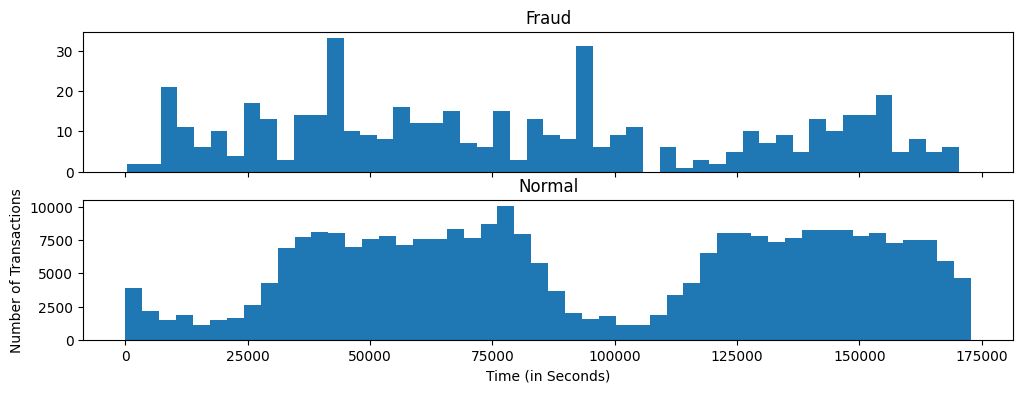

In [176]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50
ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [177]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


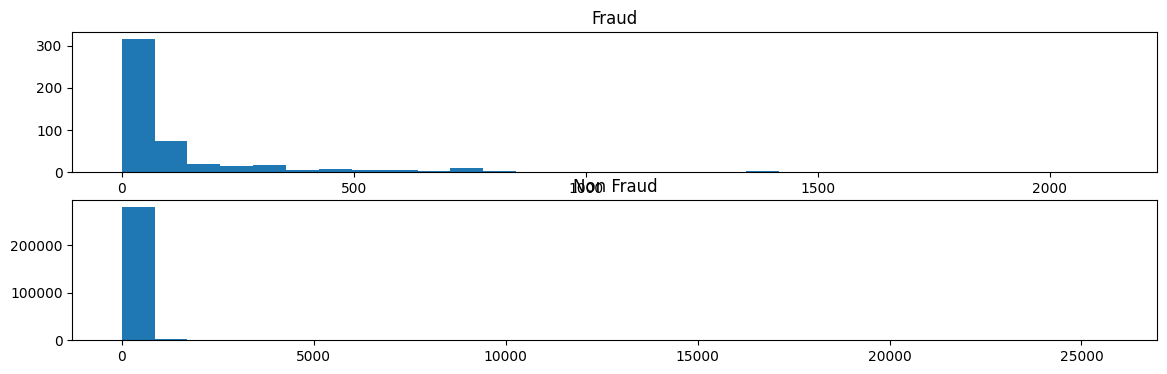

In [178]:
f , (ax1  , ax2)= plt.subplots(2 ,1 , figsize=(14,4))
bins=30
ax1.hist(df[df["Class"]==1]["Amount"] , bins=30)
ax1.set_title("Fraud")

ax2.hist(df[df["Class"]==0]["Amount"] , bins=30)
ax2.set_title("Non Fraud")

plt.show()

In [179]:
#Most transactions are small amounts, less than  100. Fraudulent transactions have a maximum value far less than normal transactions,
#Let's compare Time with Amount and see if we can learn anything new.

In [180]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


Text(0.5, 1.0, 'Non - Fraud ')

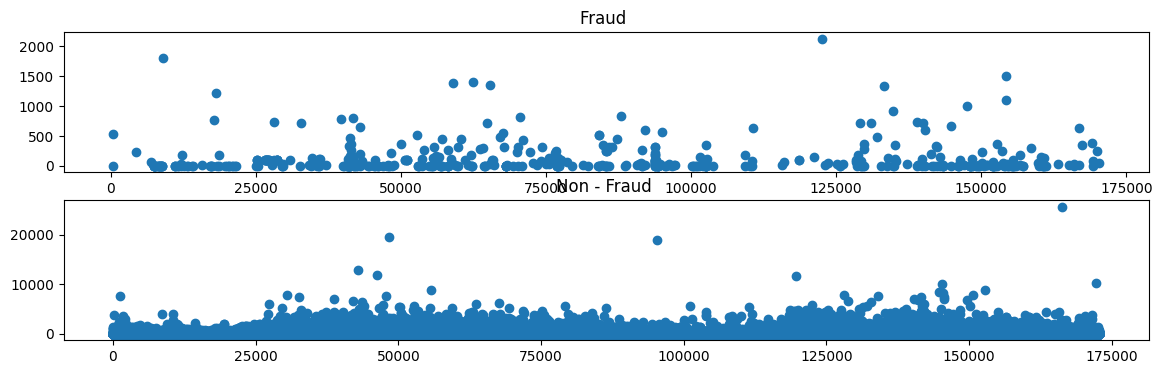

In [181]:
f , (ax1 , ax2)=plt.subplots(2,1,figsize=(14,4))

ax1.scatter(df[df["Class"]==1]["Time"] , df[df["Class"]==1]["Amount"])
ax1.set_title("Fraud ")

ax2.scatter(df[df["Class"]==0]["Time"] , df[df["Class"]==0]["Amount"])
ax2.set_title("Non - Fraud ")

Text(0.5, 1.0, 'Non - Fraud ')

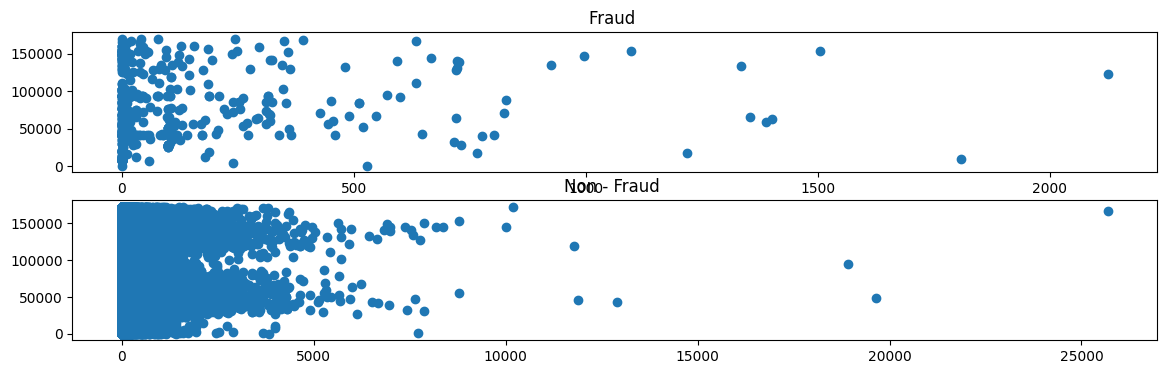

In [182]:
f , (ax1 , ax2)=plt.subplots(2,1,figsize=(14,4))

ax1.scatter(df[df["Class"]==1]["Amount"] , df[df["Class"]==1]["Time"])
ax1.set_title("Fraud ")

ax2.scatter(df[df["Class"]==0]["Amount"] , df[df["Class"]==0]["Time"])
ax2.set_title("Non - Fraud ")

In [183]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [184]:
v_column=df.iloc[:, 1:29].columns

/tmp/ipykernel_32/1051289135.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]==1][i] , bins=50)
/tmp/ipykernel_32/1051289135.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Class"]==0][i] , bins=50)
/tmp/ipykernel_32/1051289135.py:6: UserWarning: 

`distplot` is a de

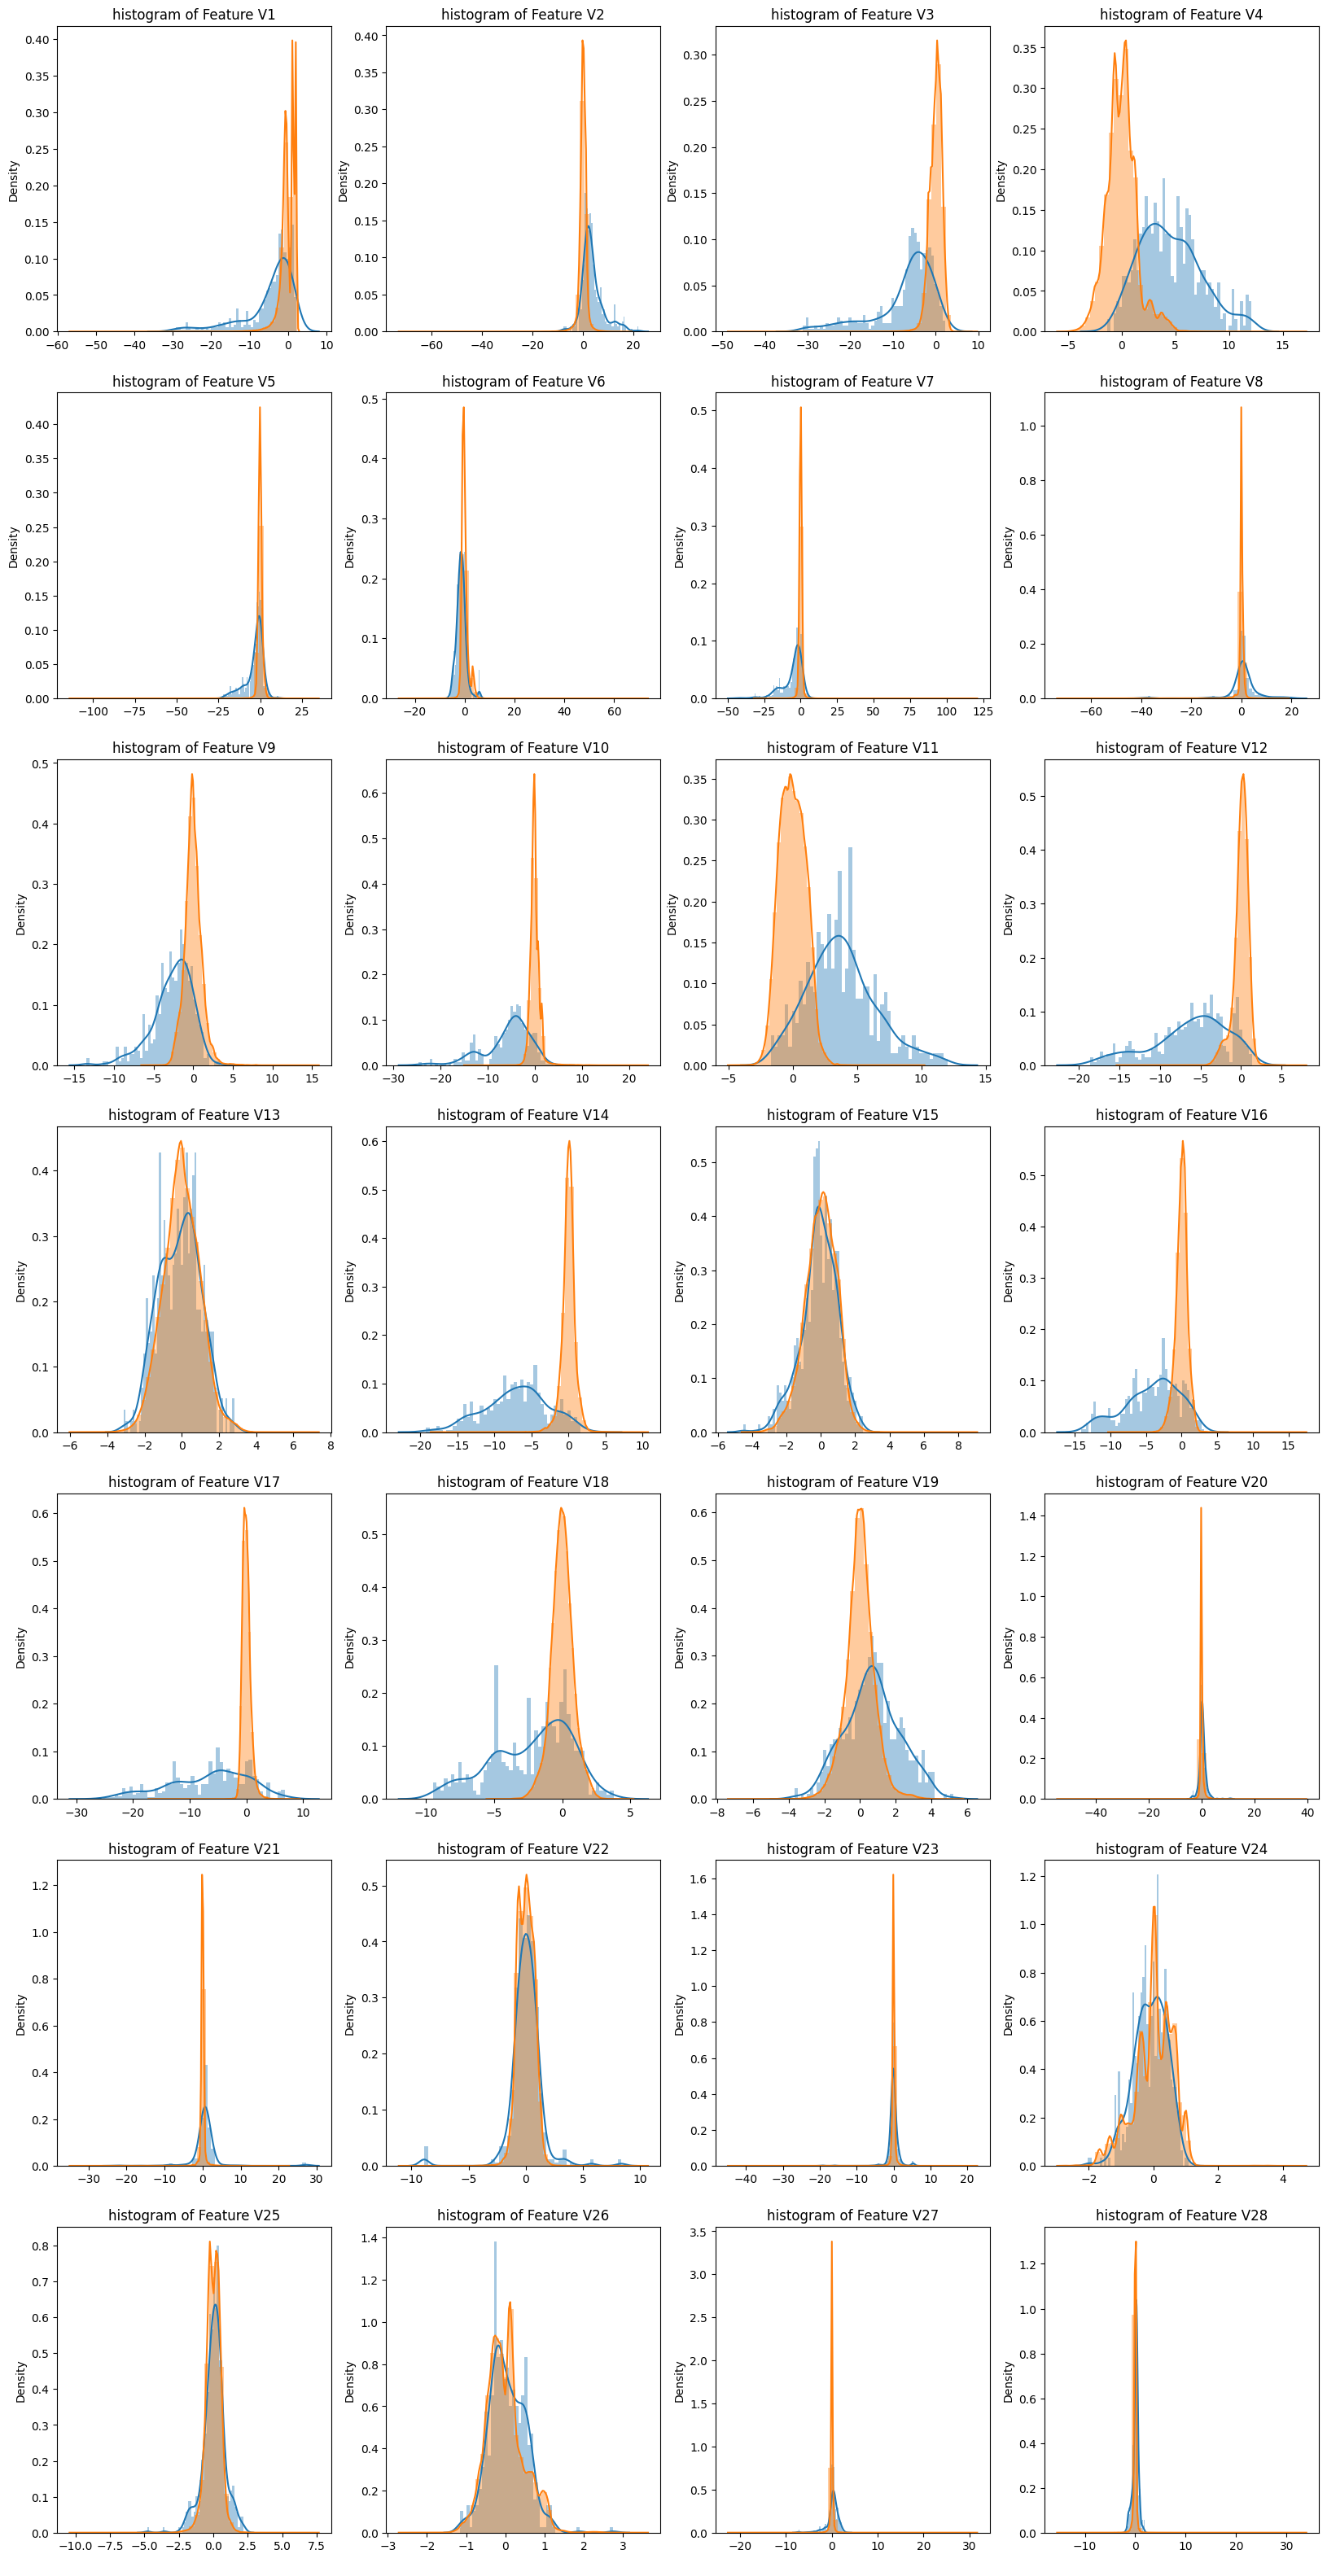

In [185]:
plt.figure(figsize=(20 , 40))
pltnumber=1
for i in v_column:
    if pltnumber<=28:
        ax=plt.subplot(7,4,pltnumber)
        sns.distplot(df[df["Class"]==1][i] , bins=50)
        sns.distplot(df[df["Class"]==0][i] , bins=50)
        ax.set_xlabel(" ")
        ax.set_title(f"histogram of Feature {i}" )
    pltnumber=pltnumber+1 

# Model Building

In [186]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**Our Datasets is Imbalance So we will Make it Balance**

In [187]:
non_fraud=df[df["Class"]==0].sample(492 , random_state=5352)
fraud=df[df["Class"]==1].sample(492 , random_state=5352)

In [188]:
final_df=pd.concat([non_fraud , fraud] , axis=0)

In [189]:
scaler=StandardScaler()

In [190]:
scaled_time=pd.DataFrame(scaler.fit_transform(final_df[["Time" , "Amount"]]))

In [191]:
final_df=final_df.drop("Amount" , axis=1)

In [192]:
final_df=final_df.reset_index().drop("index" , axis=1)

In [193]:
final_df.shape , scaled_time.shape

((984, 30), (984, 2))

In [194]:
final_df=pd.concat([final_df , scaled_time] , axis=1)

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
final_df=final_df.rename({0:"Time" , 1:"Amount"} , axis=1)

In [197]:
final_df=final_df.sample(final_df.shape[0])

In [198]:
x=final_df.drop("Class" , axis=1)
y=final_df["Class"]

In [199]:
x_train , x_test   , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [200]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [201]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 65.0 % accuracy score
Classifiers:  SVC Has a training score of 55.00000000000001 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


# Applying Grid Search CV

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train, y_train)
knears_neighbors = grid_knears.best_estimator_

In [205]:
# Support Vector Classifier
#svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#grid_svc = GridSearchCV(SVC(), svc_params)
#grid_svc.fit(x_train, y_train)
#svc = grid_svc.best_estimator_

In [206]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

# Cross Val Score

In [207]:
log_reg_score = cross_val_score(LogisticRegression(), x_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, x_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, x_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, x_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.39%
Knears Neighbors Cross Validation Score 65.19%
Support Vector Classifier Cross Validation Score 51.21%
DecisionTree Classifier Cross Validation Score 91.61%


In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [209]:
svc=SVC(kernel="sigmoid" , gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
knc=KNeighborsClassifier()
lrc=LogisticRegression(solver="liblinear" , penalty="l1")
bc=BaggingClassifier(n_estimators=50 , random_state=2)
abc=AdaBoostClassifier(n_estimators=50 , random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb=XGBClassifier(n_estimators=50 ,random_state=2)

In [210]:
clf=[svc , dtc , rfc , knc , lrc , bc , abc , gbc , xgb]

In [211]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix

In [212]:
def predictor(model):
    model.fit(x_train , y_train)
    y_pred=model.predict(x_test)
    print("accuracy_score",accuracy_score(y_test , y_pred))
    print("precision_score" , precision_score(y_test , y_pred))
    print("recall_score" , recall_score(y_test , y_pred))
    print("f1_score" , f1_score(y_test , y_pred))
    print(confusion_matrix(y_test , y_pred))

In [213]:
predictor(svc)

accuracy_score 0.4517766497461929
precision_score 0.0
recall_score 0.0
f1_score 0.0
[[ 89   0]
 [108   0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
predictor(dtc)

accuracy_score 0.9238578680203046
precision_score 0.9603960396039604
recall_score 0.8981481481481481
f1_score 0.9282296650717703
[[85  4]
 [11 97]]


In [215]:
predictor(rfc)

accuracy_score 0.9543147208121827
precision_score 0.9714285714285714
recall_score 0.9444444444444444
f1_score 0.9577464788732395
[[ 86   3]
 [  6 102]]


In [216]:
predictor(knc)

accuracy_score 0.6395939086294417
precision_score 0.6989247311827957
recall_score 0.6018518518518519
f1_score 0.6467661691542288
[[61 28]
 [43 65]]


In [217]:
predictor(lrc)

accuracy_score 0.9441624365482234
precision_score 0.9619047619047619
recall_score 0.9351851851851852
f1_score 0.9483568075117371
[[ 85   4]
 [  7 101]]


In [218]:
predictor(bc)

accuracy_score 0.9390862944162437
precision_score 0.9528301886792453
recall_score 0.9351851851851852
f1_score 0.9439252336448598
[[ 84   5]
 [  7 101]]


In [219]:
predictor(abc)

accuracy_score 0.9543147208121827
precision_score 0.9714285714285714
recall_score 0.9444444444444444
f1_score 0.9577464788732395
[[ 86   3]
 [  6 102]]


In [220]:
predictor(gbc)

accuracy_score 0.9593908629441624
precision_score 0.9629629629629629
recall_score 0.9629629629629629
f1_score 0.9629629629629629
[[ 85   4]
 [  4 104]]


In [221]:
y_test.value_counts()

Class
1    108
0     89
Name: count, dtype: int64

In [222]:
# here the final model we are considering Logistic Regression With high Precision  rate 97 %